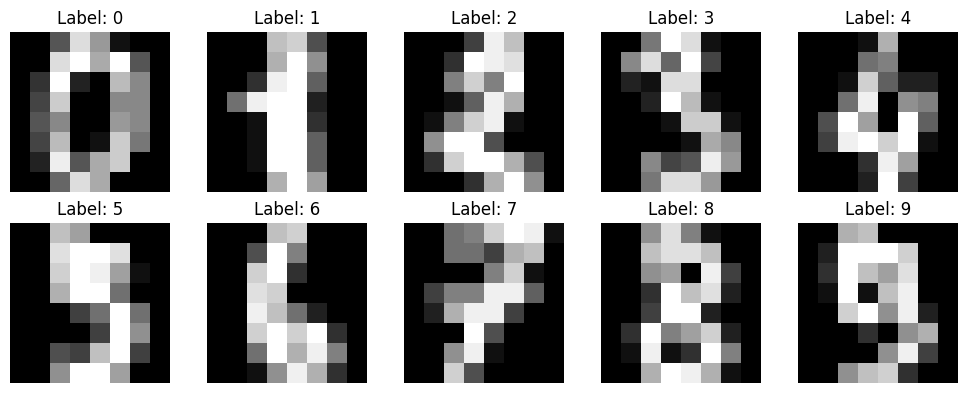

Training set shape: (1437, 64)
Testing set shape: (360, 64)
Training labels shape: (1437,)
Testing labels shape: (360,)


In [28]:
#Q1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

#from sklearn.preprocessing import MinMaxScaler

# Load the MNIST dataset
digits = load_digits()

# Visualize the first few images from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Flatten the images into 1D arrays
X = digits.images.reshape((len(digits.images), -1))

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, digits.target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


In [29]:
#Q2

data_type = digits.data.dtype
print("Data type of features:", data_type)

Data type of features: float64


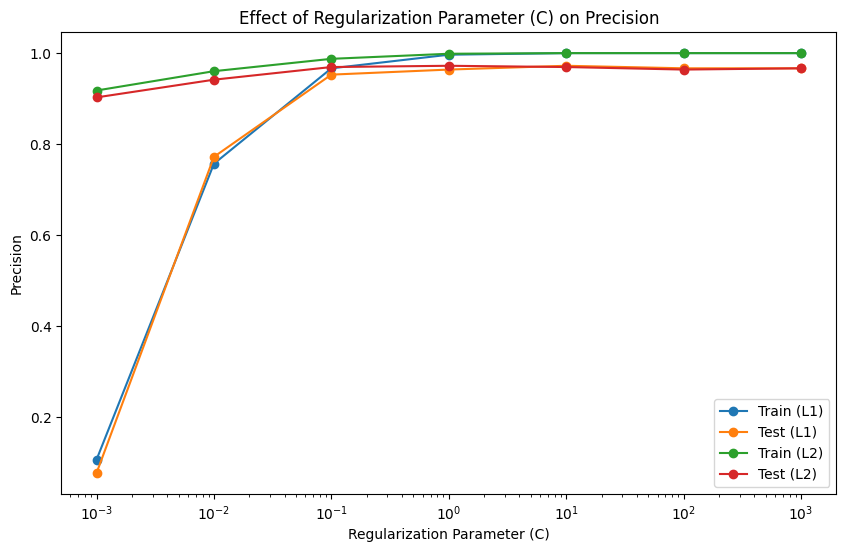

In [30]:
#Q3

# Define regularization parameters (C values)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize lists to store precision scores
train_precision_l1 = []
test_precision_l1 = []
train_precision_l2 = []
test_precision_l2 = []

# Loop through each C value
for C in C_values:
    # Logistic Regression with L1 regularization
    model_l1 = LogisticRegression(penalty='l1', C=C, solver='saga', max_iter=10000)
    model_l1.fit(X_train, y_train)
    train_precision_l1.append(precision_score(y_train, model_l1.predict(X_train), average='micro'))
    test_precision_l1.append(precision_score(y_test, model_l1.predict(X_test), average='micro'))
    
    # Logistic Regression with L2 regularization
    model_l2 = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=10000)
    model_l2.fit(X_train, y_train)
    train_precision_l2.append(precision_score(y_train, model_l2.predict(X_train), average='micro'))
    test_precision_l2.append(precision_score(y_test, model_l2.predict(X_test), average='micro'))

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_precision_l1, label='Train (L1)', marker='o')
plt.plot(C_values, test_precision_l1, label='Test (L1)', marker='o')
plt.plot(C_values, train_precision_l2, label='Train (L2)', marker='o')
plt.plot(C_values, test_precision_l2, label='Test (L2)', marker='o')
plt.title('Effect of Regularization Parameter (C) on Precision')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Precision')
plt.xscale('log')
plt.legend()
plt.show()



In [31]:
#Q4

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

solvers = ['newton-cg', 'sag', 'lbfgs','liblinear']  # Solvers supporting both L1 and L2 penalties
penalties = ['l1', 'l2']
best_precision = 0
best_solver = None
best_penalty = None

for solver in solvers:
    for penalty in penalties:
        if penalty == 'l1' and solver not in ['saga', 'liblinear']:  # Check if the combination is supported
            continue
        # Train logistic regression model
        model = LogisticRegression(solver=solver, penalty=penalty, max_iter=10000) #, random_state=42)
        model.fit(X_train, y_train)
        
        # Predictions on test set
        y_pred = model.predict(X_test)
        
        # Calculate precision
        precision = precision_score(y_test, y_pred, average='micro')
        
        # Print precision for each combination
        print(f"Solver: {solver}, Penalty: {penalty}, Precision: {precision}")
        
        # Update best precision and parameters if better precision is found
        if precision > best_precision:
            best_precision = precision
            best_solver = solver
            best_penalty = penalty

# Print the best combination
print(f"\nBest Solver: {best_solver}, Best Penalty: {best_penalty}, Best Precision: {best_precision}")


Solver: newton-cg, Penalty: l2, Precision: 0.9722222222222222
Solver: sag, Penalty: l2, Precision: 0.9722222222222222
Solver: lbfgs, Penalty: l2, Precision: 0.9722222222222222
Solver: liblinear, Penalty: l1, Precision: 0.9722222222222222
Solver: liblinear, Penalty: l2, Precision: 0.9666666666666667

Best Solver: newton-cg, Best Penalty: l2, Best Precision: 0.9722222222222222


In [34]:
#Q5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# Initialize Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree classifier
tree_clf.fit(X_train, y_train)

# Predictions on the test set
tree_pred = tree_clf.predict(X_test)

# Compute precision score for Decision Tree classifier
tree_precision = precision_score(y_test, tree_pred, average='micro')


# Initialize Logistic Regression classifier with the best solver and penalty
best_lr_clf = LogisticRegression(penalty=best_penalty, solver=best_solver, max_iter=1000)

# Train Logistic Regression classifier
best_lr_clf.fit(X_train, y_train)

# Predictions on the test set using Logistic Regression classifier
best_lr_pred = best_lr_clf.predict(X_test)

# Compute precision score for Logistic Regression classifier
best_lr_precision = precision_score(y_test, best_lr_pred, average='micro')

# Compare performance of Decision Tree and Logistic Regression classifiers
print("\nPerformance Comparison:")
print("Decision Tree Precision:", tree_precision)
print("Best Logistic Regression Precision:", best_lr_precision)



Performance Comparison:
Decision Tree Precision: 0.8416666666666667
Best Logistic Regression Precision: 0.9722222222222222


#Q6

Advantages and Disadvantages of Decision Trees:
Advantages:

    Interpretability: Decision trees are easy to understand and interpret. The decision-making process can be visualized, making it suitable for explaining the model to stakeholders.
    Non-linearity: Decision trees can capture non-linear relationships between features and target variables without the need for feature transformation.
    Handling of Missing Values: Decision trees can handle missing values in the data without the need for imputation.
    Robustness to Outliers: Decision trees are robust to outliers in the data as they partition the feature space into regions.

Disadvantages:

    Overfitting: Decision trees are prone to overfitting, especially when the tree depth is not limited. This can result in poor generalization to unseen data.
    Instability: Small variations in the data can lead to significantly different decision trees, making them unstable.
    High Variance: Decision trees have high variance, meaning they can produce very different trees with slight variations in the training data.
    Greedy Algorithm: Decision trees use a greedy algorithm to make decisions at each node, which may not always result in the globally optimal tree.

Advantages and Disadvantages of Logistic Regression:
Advantages:

    Efficiency: Logistic regression is computationally efficient and can handle large datasets with a large number of features.
    Probabilistic Interpretation: Logistic regression outputs probabilities, making it easy to interpret the likelihood of different classes.
    Low Variance: Logistic regression tends to have low variance, making it less prone to overfitting compared to more complex models.
    Feature Importance: Logistic regression coefficients provide insight into the importance of different features in predicting the target variable.

Disadvantages:

    Assumption of Linearity: Logistic regression assumes a linear relationship between features and the log-odds of the target variable, which may not always hold true.
    Limited Expressiveness: Logistic regression may not capture complex non-linear relationships between features and the target variable as effectively as decision trees or other non-linear models.
    Sensitive to Outliers: Logistic regression is sensitive to outliers in the data, which can skew the estimated coefficients and affect model performance.
    Multicollinearity: Logistic regression assumes that features are not highly correlated with each other (multicollinearity), which can lead to unstable coefficient estimates.

Recommendations for the MNIST Dataset:

Based on the experimental results:

    Decision Tree vs. Logistic Regression: Decision trees may have higher variance and tend to overfit more compared to logistic regression, especially on high-dimensional datasets like MNIST. However, logistic regression assumes a linear relationship between features and the target variable, which may not capture the complex patterns present in image data as effectively as decision trees.

    Recommendation: Considering the interpretability and efficiency of logistic regression, along with its ability to handle large datasets, it may be a better choice for the MNIST dataset. However, it's essential to address potential issues such as feature engineering and regularization to improve performance. Additionally, ensemble methods like Random Forests or Gradient Boosting may be worth exploring as they combine multiple decision trees to reduce overfitting while capturing complex patterns in the data.

In summary, logistic regression can be a suitable choice for the MNIST dataset due to its efficiency, interpretability, and ability to handle high-dimensional data. However, it's essential to evaluate multiple models and consider factors such as interpretability, performance, and computational efficiency before making a final decision.
